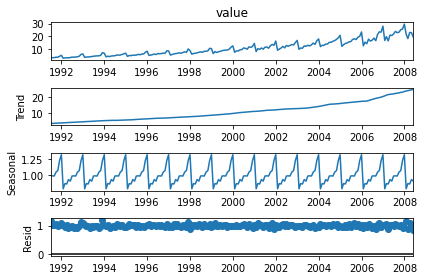

                seas     trend     resid  actual_values
date                                                   
1991-07-01  0.987845  3.060085  1.166629       3.526591
1991-08-01  0.990481  3.124765  1.027745       3.180891
1991-09-01  0.987476  3.189445  1.032615       3.252221
1991-10-01  1.048329  3.254125  1.058513       3.611003
1991-11-01  1.074527  3.318805  0.999923       3.565869
"date", "value"
1991-07-01, 3.526591
1991-08-01, 3.180891
1991-09-01, 3.252221
1991-10-01, 3.611003
1991-11-01, 3.565869
1991-12-01, 4.306371
1992-01-01, 5.088335
1992-02-01, 2.814520
1992-03-01, 2.985811
1992-04-01, 3.204780
1992-05-01, 3.127578
1992-06-01, 3.270523
1992-07-01, 3.737851
1992-08-01, 3.558776
1992-09-01, 3.777202
1992-10-01, 3.924490
1992-11-01, 4.386531
1992-12-01, 5.810549
1993-01-01, 6.192068
1993-02-01, 3.450857
1993-03-01, 3.772307
1993-04-01, 3.734303
1993-05-01, 3.905399
1993-06-01, 4.049687
1993-07-01, 4.315566
1993-08-01, 4.562185
1993-09-01, 4.608662
1993-10-01, 4.667851
1993

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas                 as pd
import matplotlib.pyplot      as plt

# Import data.
PATH = "../datasets/"
FILE = "drugSales.csv"
df   = pd.read_csv(PATH + FILE,  parse_dates=['date'], index_col='date')

# Perform decomposition using multiplicative decomposition.
tseries = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend="freq")

tseries.plot()
plt.show()

# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
dfComponents = pd.concat([tseries.seasonal, tseries.trend,
                          tseries.resid, tseries.observed], axis=1)
dfComponents.columns = ['seas', 'trend', 'resid', 'actual_values']
print(dfComponents.head())

print('"date", "value"')

for index, row in dfComponents.iterrows():
    value = row['seas'] * row['trend'] * row['resid']
    print(f"{index.strftime('%Y-%m-%d')}, {'{:.6f}'.format(value)}")

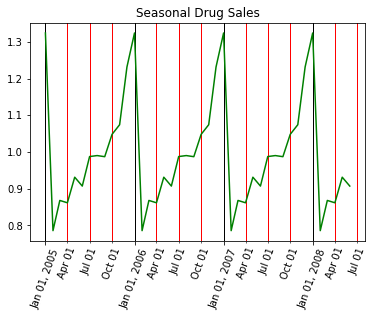

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas                 as pd
import matplotlib.pyplot      as plt
import matplotlib.dates       as mdates
# Import data.
PATH = "../datasets/"
FILE = "drugSales.csv"
df   = pd.read_csv(PATH + FILE,  parse_dates=['date'], index_col='date')
type(df.index)

fig, ax = plt.subplots()

# Perform decomposition using multiplicative decomposition.
tseries  = seasonal_decompose(df['value'], model='multiplicative',
                              extrapolate_trend='freq')
trend    = tseries.trend
seasonal = tseries.seasonal

# Set vertical major grid.
ax.xaxis.set_major_locator(mdates.YearLocator(day=1))
ax.xaxis.grid(True, which = 'major', linewidth = 1, color = 'black')

# Set vertical minor grid.
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1,4,7,10),bymonthday=1))
ax.xaxis.grid(True, which = 'minor', linewidth = 1, color = 'red')

start, end = '2005-01', '2009-12'
ax.plot(seasonal.loc[start:end], color='green')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=70)

ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.title("Seasonal Drug Sales")
plt.show()

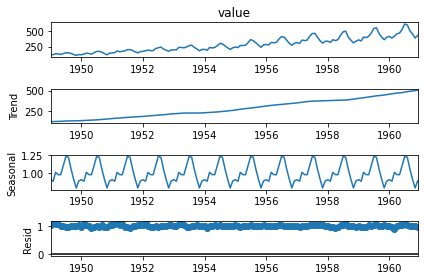

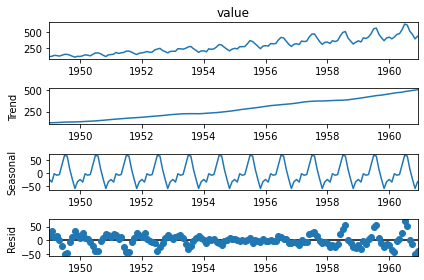

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas                 as pd
import matplotlib.pyplot      as plt

# Import data.
PATH = "../datasets/"
FILE = "AirPassengers.csv"
df   = pd.read_csv(PATH + FILE,  parse_dates=['date'], index_col='date')

# Perform decomposition using multiplicative decomposition.
tseriesMultiplicative = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend="freq")

tseriesMultiplicative.plot()
plt.show()

# Perform decomposition using additive decomposition.
tseriesAdditive = seasonal_decompose(df['value'], model='additive', extrapolate_trend="freq")

tseriesAdditive.plot()
plt.show()

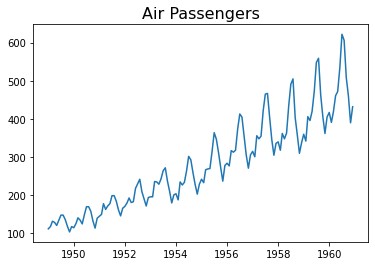

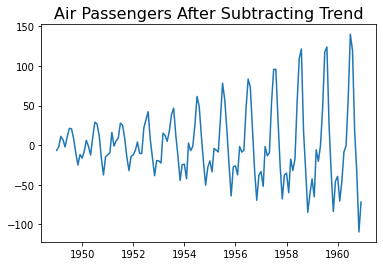

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt

# Import Data
PATH      = "../datasets/"
FILE      = "AirPassengers.csv"
df        = pd.read_csv(PATH + FILE, parse_dates=['date'], index_col='date')
tseries   = seasonal_decompose(df['value'], model='additive',
                               extrapolate_trend='freq')

plt.plot(df['value'])
plt.title("Air Passengers", fontsize=16)
plt.show()

detrended = df['value'] - tseries.trend
plt.plot(detrended)
plt.title('Air Passengers After Subtracting Trend', fontsize=16)
plt.show()

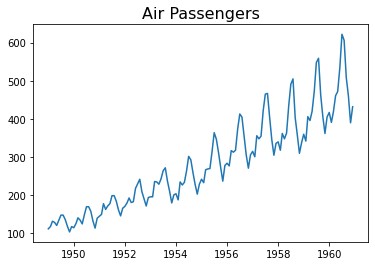

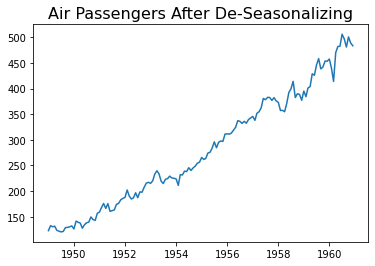

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt

# Import Data
PATH      = "../datasets/"
FILE      = "AirPassengers.csv"
df        = pd.read_csv(PATH + FILE, parse_dates=['date'], index_col='date')
tseries   = seasonal_decompose(df['value'], model='multiplicative',
                               extrapolate_trend='freq')

plt.plot(df['value'])
plt.title("Air Passengers", fontsize=16)
plt.show()

deseasonalized = df.value.values / tseries.seasonal
plt.plot(deseasonalized)
plt.title('Air Passengers After De-Seasonalizing', fontsize=16)
plt.show()